In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
'''Changes the directory to the main folder to import pipeline.py'''
import sys
sys.path.append('../')
from utils import *

import pandas as pd
import numpy as np

In [3]:
'''Read the dataframe with the remaining 374 S%P500 tickers'''
data_matrix = pd.read_csv('../data/interim/data_matrix.csv', skiprows=None)
data_matrix

,Ticker,01/03/00,01/04/00,01/05/00,01/06/00,01/07/00,01/10/00,01/11/00,01/12/00,01/13/00,...,08/19/20,08/20/20,08/21/20,08/24/20,08/25/20,08/26/20,08/27/20,08/28/20,08/31/20,09/01/20
0,AMZN,89.380,81.940,71.750,65.56,69.56,69.19,66.750,63.560,65.940,...,3260.48,3297.37,3284.72,3307.46,3346.49,3441.85,3400.00,3401.80,3450.96,3499.12
1,AZO,30.560,30.440,30.060,29.06,30.44,30.69,30.060,29.810,30.000,...,1210.00,1203.50,1209.07,1209.93,1201.66,1198.01,1195.89,1189.12,1196.31,1222.43
2,BBY,57.500,57.380,56.690,56.50,58.25,57.63,55.880,54.440,53.000,...,111.96,111.70,114.00,117.37,112.64,112.31,111.22,111.23,110.91,113.50
3,BKNG,51.250,54.000,59.940,57.50,57.25,54.25,52.810,51.130,51.630,...,1767.47,1768.69,1779.37,1834.44,1853.80,1866.97,1893.50,1945.25,1910.45,1928.86
4,BWA,38.690,38.690,38.880,38.38,39.44,39.00,38.880,38.810,39.060,...,41.01,40.66,40.59,41.38,41.00,41.53,40.76,41.43,40.59,41.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,PXD,8.438,8.563,8.563,8.50,8.75,8.50,8.625,8.188,8.438,...,104.77,102.67,102.11,104.75,106.92,104.41,105.38,105.60,103.93,102.98
370,SLB,54.940,54.190,54.880,57.75,58.81,59.38,60.690,59.190,60.880,...,19.72,18.77,18.58,19.55,19.26,18.67,18.70,19.42,19.01,18.63
371,VLO,19.130,18.940,19.810,20.25,20.00,19.94,19.630,19.750,19.940,...,54.26,52.70,52.62,54.99,54.25,53.70,53.44,54.89,52.59,52.47
372,WMB,31.000,30.310,32.000,32.88,33.75,33.13,32.750,32.310,33.060,...,21.65,21.40,21.41,21.68,21.39,21.05,20.96,21.07,20.76,20.96


# **General Matrix**

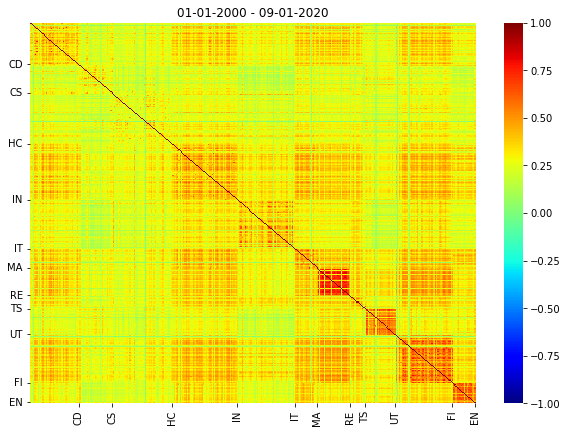

In [4]:
'''
Call the class with one of the following correlation definition:
 * Pearson: 'p', 'pearson', 'P'
 * Spearman Rank: 's', 'spearman', 'S'
 * Distance: 'd', 'distance', 'D'
'''
correlation_coeff = 'pearson'

'''Call the correlation class'''
corr = Correlation_Analysis(data_matrix, correlation_coeff)

'''Call the general heatmap function'''
corr.general_correlation_matrix()

'''Call the split the data matrix'''
corr_matrices = corr.split_data_correlation()

# **Moments per Epoch**

In [5]:
'''Call the moments class'''
moments = Moments(corr)

'''Calculate the moments per epoch and save them in a dataframe'''
moments.get_dataframe()
df_moments = moments.df
df_moments.head()

,ACC,STD,SKEW,KURT
0,0.113703,0.176097,0.024047,3.069629
1,0.169270,0.220531,0.059425,2.684090
2,0.103517,0.189240,0.137567,3.163683
3,0.062299,0.189976,0.090983,3.199510
4,0.083515,0.192194,0.074276,3.063948


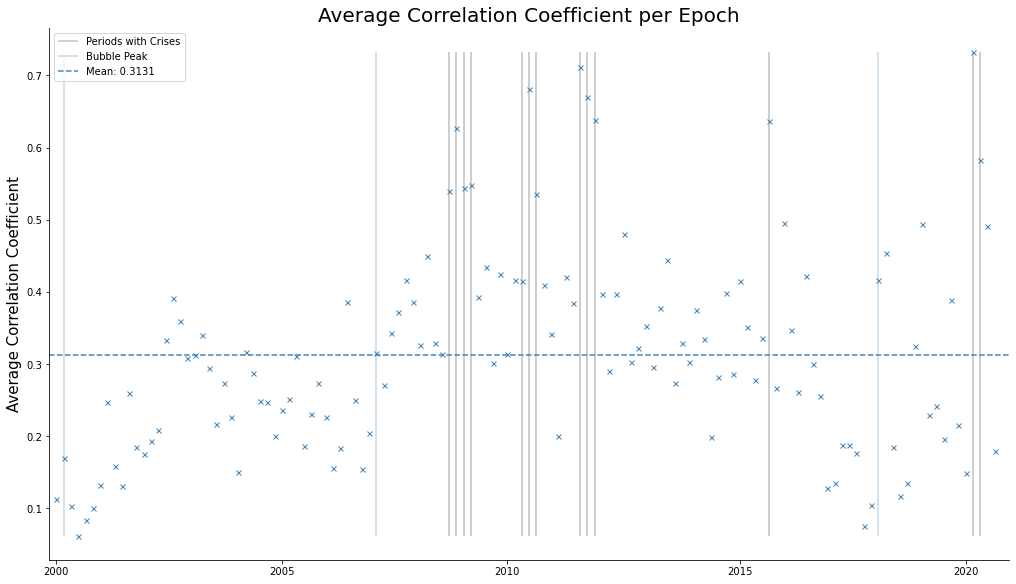

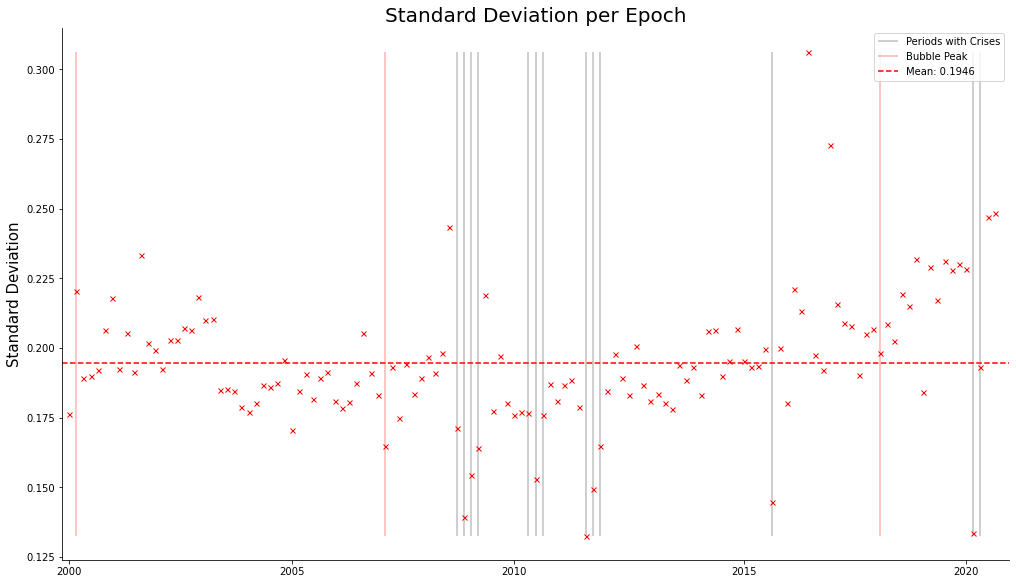

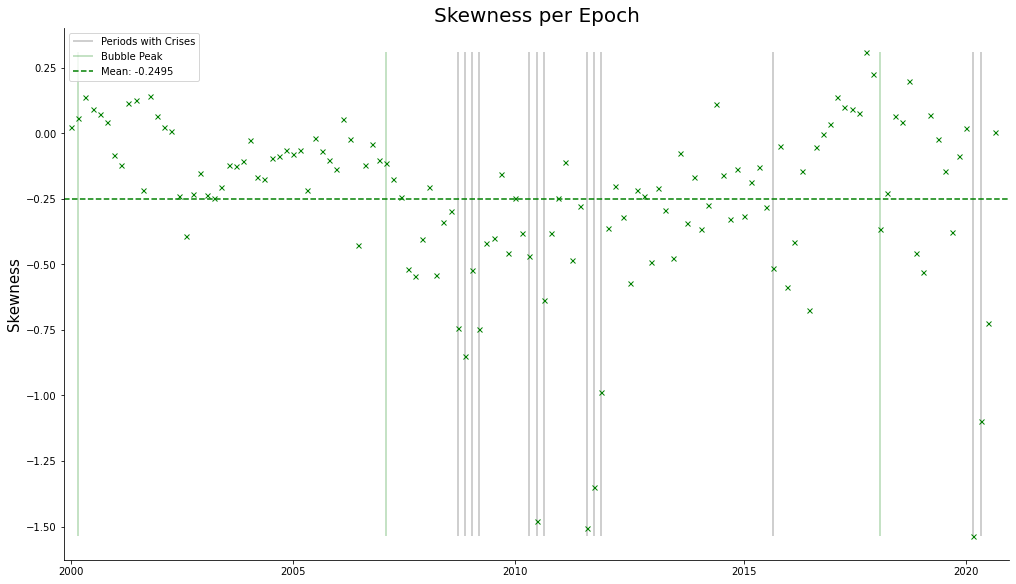

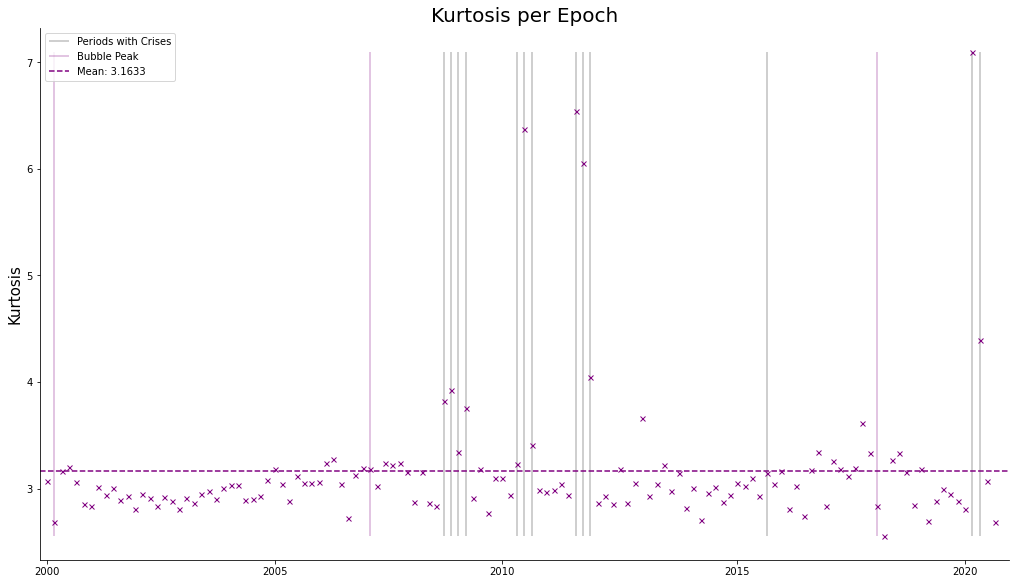

In [6]:
'''Plot the evoultion over time of each moment'''
moments.get_plot('acc')
moments.get_plot('std')
moments.get_plot('skew')
moments.get_plot('kurt')

Order 2;   r^2 score: 0.2711


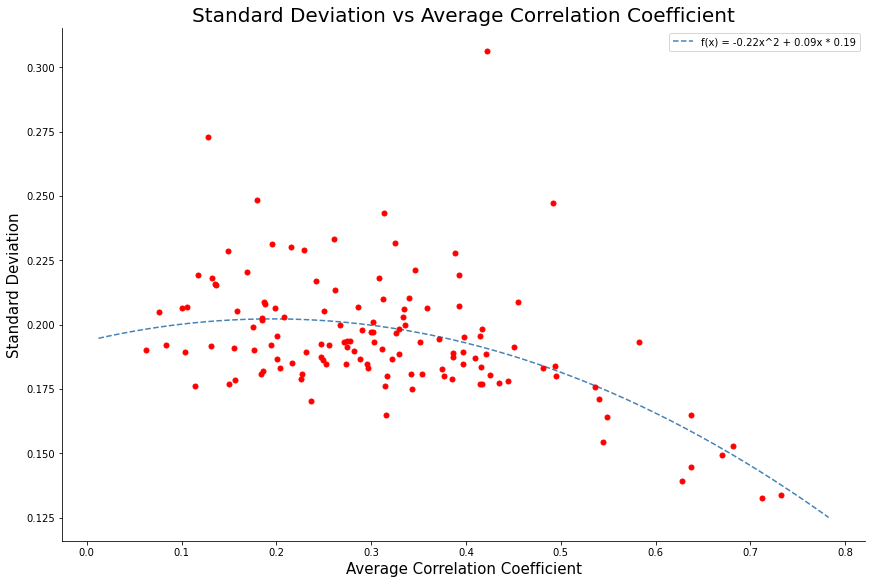

Order 2;   r^2 score: 0.9014


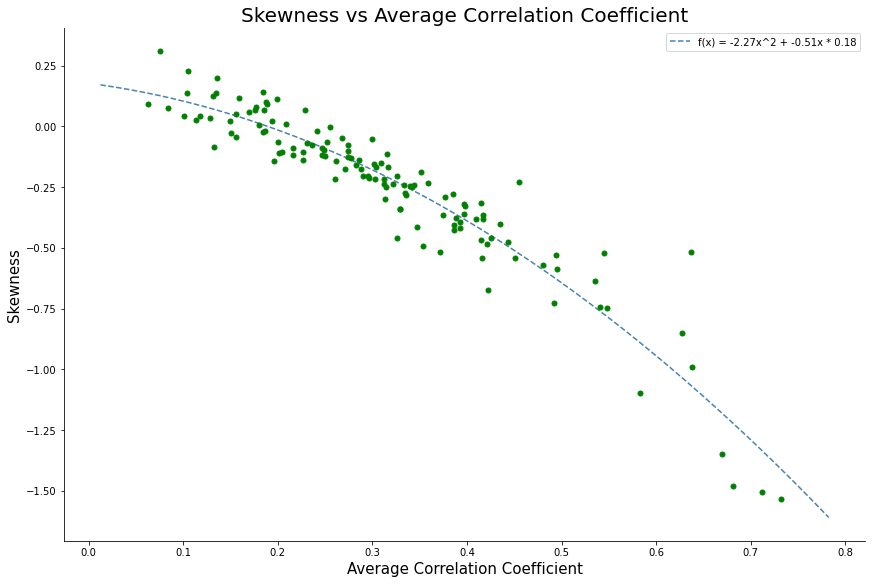

Order 2;   r^2 score: 0.7553


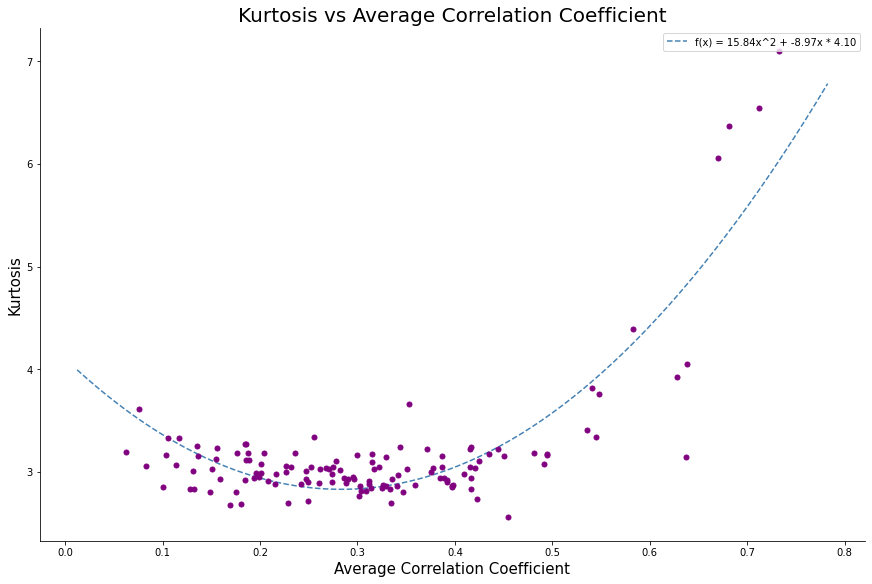

In [7]:
'''Plot the others moments againts the Average Correlation Coefficient'''
moments.get_plot('std','acc')
moments.get_plot('skew','acc')
moments.get_plot('kurt','acc')

# **Eigenvalues and Participation Ratios**

In [36]:
eig = Eig(corr, plot_per_epoch=False)

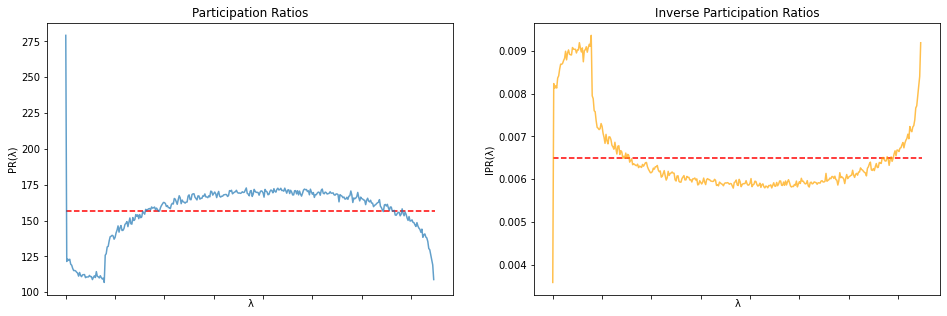

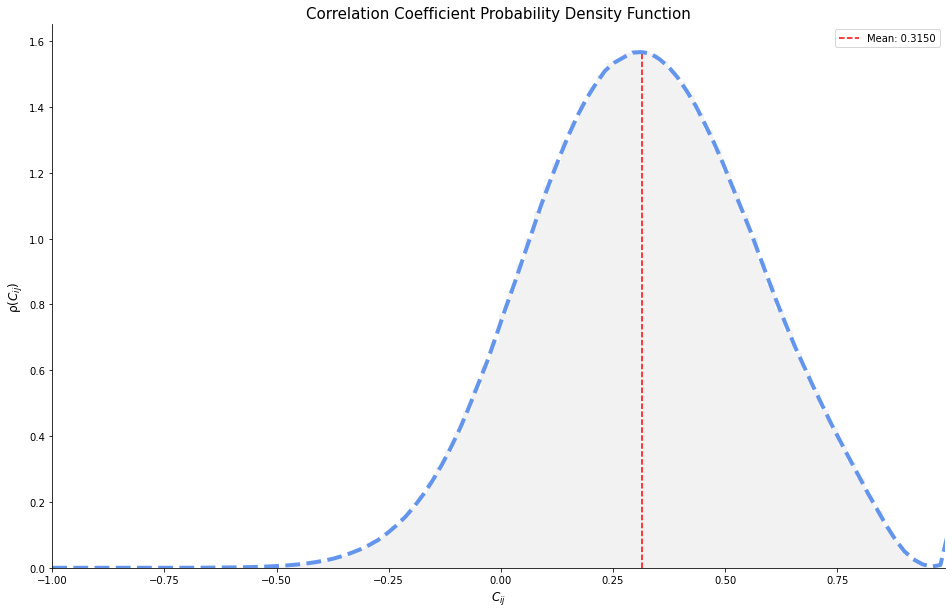

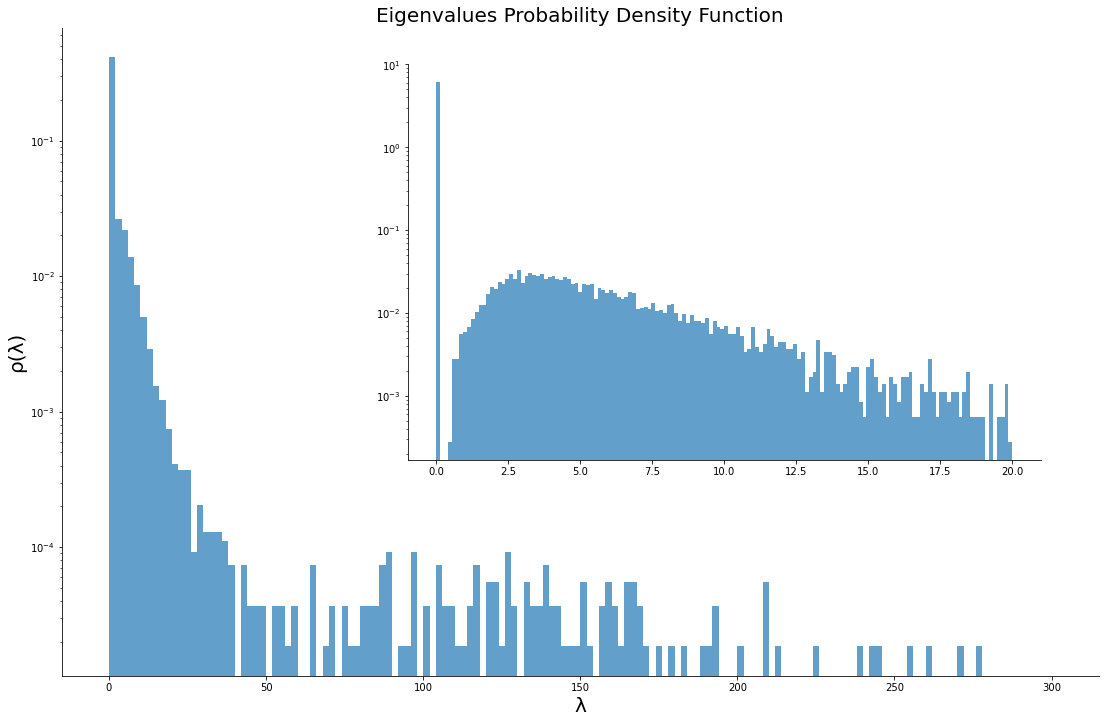

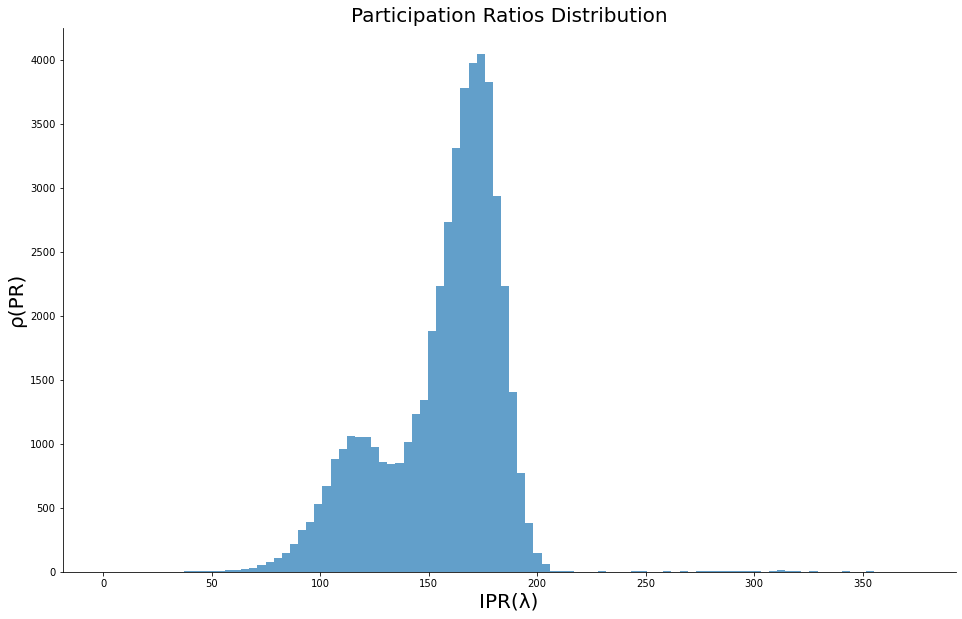

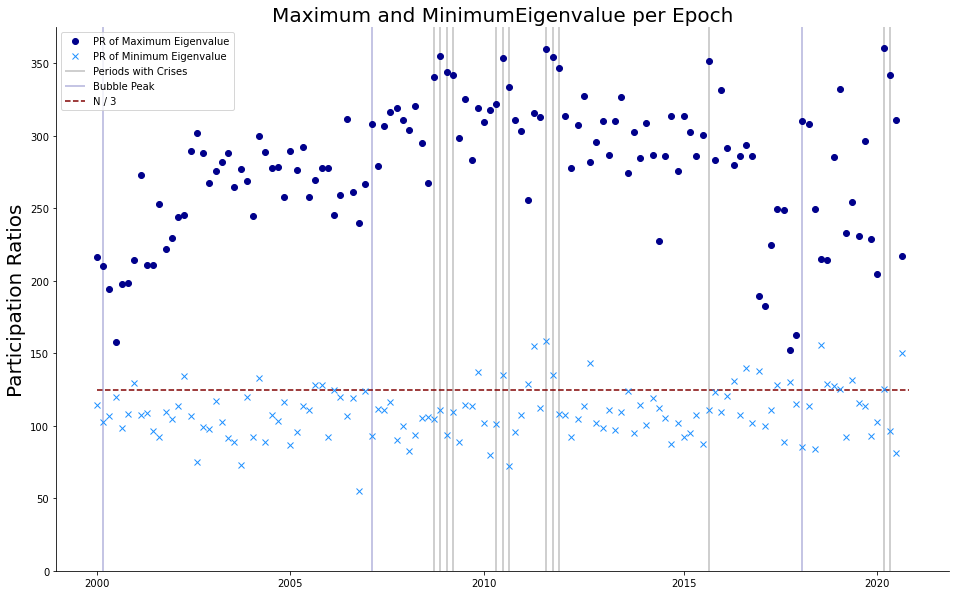

In [41]:
eig.plots()

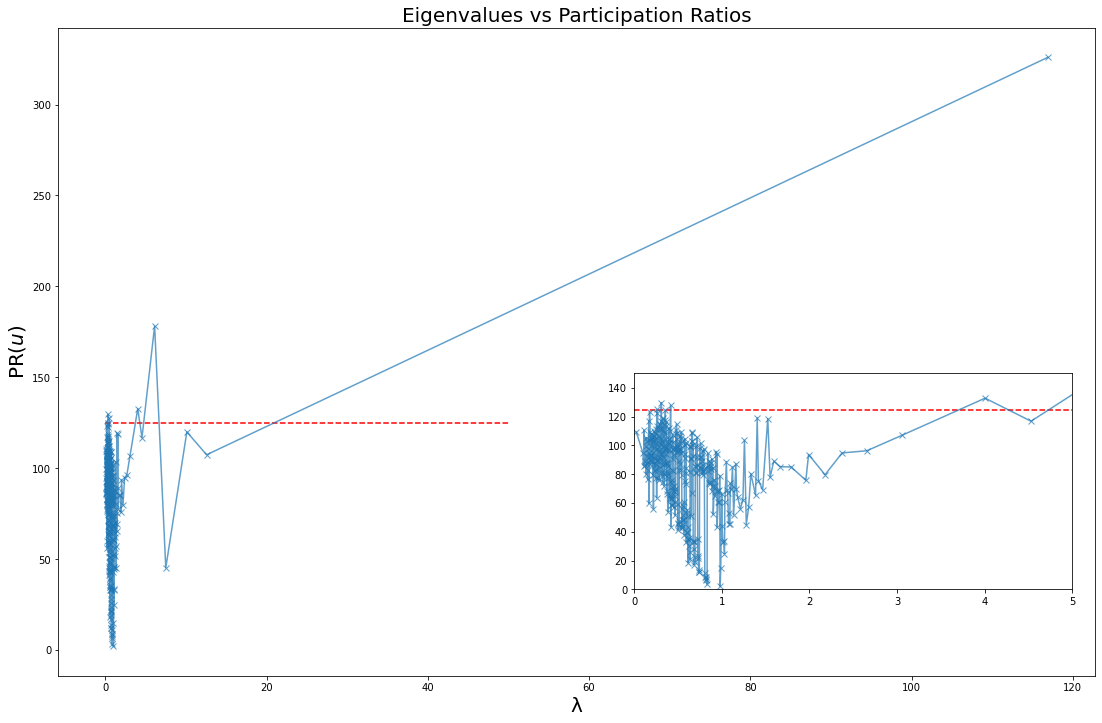

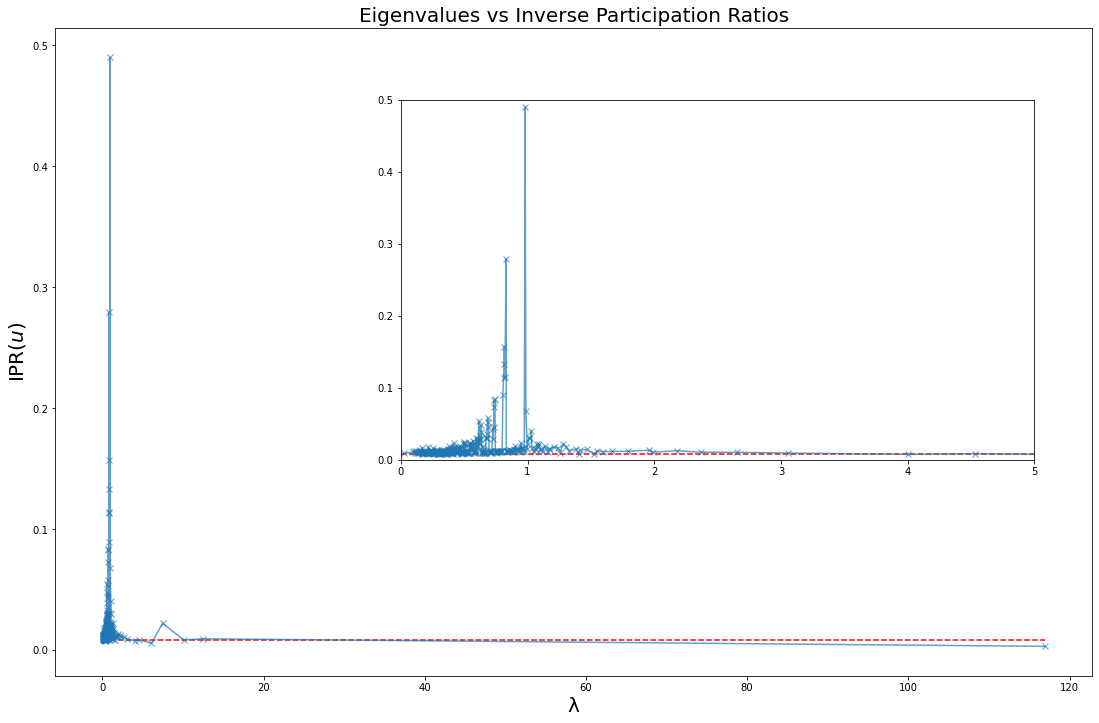

In [40]:
eig.general_plots()